## 1. What is pandas?

- [pandas main page](http://pandas.pydata.org/)
- [pandas installation instructions](http://pandas.pydata.org/pandas-docs/stable/install.html)
- [Anaconda distribution of Python](https://www.continuum.io/downloads) (includes pandas)

In [1]:
# conventional way to import pandas
import pandas as pd

## 2. How do I read a tabular data file into pandas?

In [3]:
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
orders = pd.read_table('data/chipotle.tsv')

In [4]:
# examine the first 5 rows
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Documentation for [**`read_table`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

In [5]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('data/u.user', sep='|', header=None, names=user_cols)

In [6]:
# examine the first 5 rows
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 3. How do I select a pandas Series from a DataFrame?

In [7]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_table('data/ufo.csv', sep=',')

In [8]:
# read_csv is equivalent to read_table, except it assumes a comma separator
ufo = pd.read_csv('data/ufo.csv')

In [9]:
# examine the first 5 rows
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [10]:
# select the 'City' Series using bracket notation
ufo['City']

# or equivalently, use dot notation
ufo.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

**Bracket notation** will always work, whereas **dot notation** has limitations:

- Dot notation doesn't work if there are **spaces** in the Series name
- Dot notation doesn't work if the Series has the same name as a **DataFrame method or attribute** (like 'head' or 'shape')
- Dot notation can't be used to define the name of a **new Series** (see below)

In [11]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 4. Why do some pandas commands end with parentheses (and others don't)?

In [12]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('data/imdb_1000.csv')

**Methods** end with parentheses, while **attributes** don't:

In [13]:
# example method: show the first 5 rows
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [14]:
# example method: calculate summary statistics
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [15]:
# example attribute: number of rows and columns
movies.shape

(979, 6)

In [16]:
# example attribute: data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [17]:
# use an optional parameter to the describe method to summarize only 'object' columns
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 5. How do I rename columns in a pandas DataFrame?

In [18]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')

In [19]:
# examine the column names
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [20]:
# rename two of the columns by using the 'rename' method
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

Documentation for [**`rename`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [21]:
# replace all of the column names by overwriting the 'columns' attribute
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [22]:
# replace the column names during the file reading process by using the 'names' parameter
ufo = pd.read_csv('data/ufo.csv', header=0, names=ufo_cols)
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [23]:
# replace all spaces with underscores in the column names by using the 'str.replace' method
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

Documentation for [**`str.replace`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 6. How do I remove columns from a pandas DataFrame?

In [24]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [25]:
# remove a single column (axis=1 refers to columns)
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [26]:
# remove multiple columns at once
ufo.drop(['City', 'State'], axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [27]:
# remove multiple rows at once (axis=0 refers to rows)
ufo.drop([0, 1], axis=0, inplace=True)
ufo.head()

,Shape Reported,Time
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00


[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 7. How do I sort a pandas DataFrame or a Series?

In [28]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


**Note:** None of the sorting methods below affect the underlying data. (In other words, the sorting is temporary).

In [29]:
# sort the 'title' Series in ascending order (returns a Series)
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [30]:
# sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) for a **Series**. (Prior to version 0.17, use [**`order`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.order.html) instead.)

In [31]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [32]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."


Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) for a **DataFrame**. (Prior to version 0.17, use [**`sort`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sort.html) instead.)

In [33]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['content_rating', 'duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


[Summary of changes to the sorting API](http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#changes-to-sorting-api) in pandas 0.17

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 8. How do I filter rows of a pandas DataFrame by column value?

In [34]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [35]:
# examine the number of rows and columns
movies.shape

(979, 6)

**Goal:** Filter the DataFrame rows to only show movies with a 'duration' of at least 200 minutes.

In [36]:
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [37]:
# confirm that the list has the same length as the DataFrame
len(booleans)

979

In [39]:
# examine the first five list elements
booleans[0:5]

[False, False, True, False, False]

In [40]:
# convert the list to a Series
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [41]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [42]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]

# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [43]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

# or equivalently, use the 'loc' method
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 9. How do I apply multiple filter criteria to a pandas DataFrame?

In [44]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [45]:
# filter the DataFrame to only show movies with a 'duration' of at least 200 minutes
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


Understanding **logical operators:**

- **`and`**: True only if **both sides** of the operator are True
- **`or`**: True if **either side** of the operator is True

In [46]:
# demonstration of the 'and' operator
print(True and True)
print(True and False)
print(False and False)

True
False
False


In [47]:
# demonstration of the 'or' operator
print(True or True)
print(True or False)
print(False or False)

True
True
False


Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**Goal:** Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [48]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [49]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


**Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [50]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 10. Your pandas questions answered!

**Question:** When reading from a file, how do I read in only a subset of the columns?

In [3]:
# read a dataset of UFO reports into a DataFrame, and check the columns
ufo = pd.read_csv('data/ufo.csv')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [4]:
# specify which columns to include by name
ufo = pd.read_csv('data/ufo.csv', usecols=['City', 'State'])

# or equivalently, specify columns by position
ufo = pd.read_csv('data/ufo.csv', usecols=[0, 4])
ufo.columns

Index(['City', 'Time'], dtype='object')

**Question:** When reading from a file, how do I read in only a subset of the rows?

In [5]:
# specify how many rows to read
ufo = pd.read_csv('data/ufo.csv', nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

**Question:** How do I iterate through a Series?

In [7]:
# Series are directly iterable (like a list)
#print(dir(ufo.City))
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


**Question:** How do I iterate through a DataFrame?

In [8]:
# various methods are available to iterate through a DataFrame
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


Documentation for [**`iterrows`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html)

**Question:** How do I drop all non-numeric columns from a DataFrame?

In [9]:
# read a dataset of alcohol consumption into a DataFrame, and check the data types
drinks = pd.read_csv('data/drinks.csv')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [10]:
# only include numeric columns in the DataFrame
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

Documentation for [**`select_dtypes`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html)

**Question:** How do I know whether I should pass an argument as a string or a list?

In [11]:
# describe all of the numeric columns
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [12]:
# pass the string 'all' to describe all columns
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [13]:
# pass a list of data types to only describe certain types
drinks.describe(include=['object', 'float64'])

,country,total_litres_of_pure_alcohol,continent
count,193,193.000000,193
unique,193,NaN,6
top,Afghanistan,NaN,Africa
freq,1,NaN,53
mean,NaN,4.717098,NaN
std,NaN,3.773298,NaN
min,NaN,0.000000,NaN
25%,NaN,1.300000,NaN
50%,NaN,4.200000,NaN
75%,NaN,7.200000,NaN


In [14]:
# pass a list even if you only want to describe a single data type
drinks.describe(include=['object'])

,country,continent
count,193,193
unique,193,6
top,Afghanistan,Africa
freq,1,53


Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 11. How do I use the "axis" parameter in pandas?

In [15]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [16]:
# drop a column (temporarily)
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [17]:
# drop a row (temporarily)
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


When **referring to rows or columns** with the axis parameter:

- **axis 0** refers to rows
- **axis 1** refers to columns

In [18]:
# calculate the mean of each numeric column
drinks.mean()

# or equivalently, specify the axis explicitly
drinks.mean(axis=0)

C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\881140685.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean()
C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\881140685.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis=0)


beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [19]:
# calculate the mean of each row
drinks.mean(axis=1).head()

C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\289200899.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis=1).head()


0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

When performing a **mathematical operation** with the axis parameter:

- **axis 0** means the operation should "move down" the row axis
- **axis 1** means the operation should "move across" the column axis

In [20]:
# 'index' is an alias for axis 0
drinks.mean(axis='index')

C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\1177939856.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis='index')


beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [21]:
# 'columns' is an alias for axis 1
drinks.mean(axis='columns').head()

C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\1443029028.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis='columns').head()


0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 12. How do I use string methods in pandas?

In [22]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('data/chipotle.tsv')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [23]:
# normal way to access string methods in Python
'hello'.upper()

'HELLO'

In [24]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [27]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [28]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [29]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\7676934.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders.choice_description.str.replace('[', '').str.replace(']', '').head()


0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [33]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]]', '').head()

C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\1086997848.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  orders.choice_description.str.replace('[\[\]]', '').head()


0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

[String handling section](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) of the pandas API reference

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 13. How do I change the data type of a pandas Series?

In [34]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [35]:
# examine the data type of each Series
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [38]:
# change the data type of an existing Series
drinks['beer_servings'] = drinks.beer_servings.astype(float)
#drinks.beer_servings.astype(float).head()
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Documentation for [**`astype`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)

In [39]:
# alternatively, change the data type of a Series while reading in a file
drinks = pd.read_csv('data/drinks.csv', dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [40]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('data/chipotle.tsv')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [41]:
# examine the data type of each Series
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [42]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).mean()

C:\Users\chaitu\AppData\Local\Temp\ipykernel_13616\2324389161.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders.item_price.str.replace('$', '').astype(float).mean()


7.464335785374397

In [43]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [44]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 14. When should I use a "groupby" in pandas?

In [2]:
import pandas as pd
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [3]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [9]:
# calculate the mean beer servings just for countries in Africa
drinks[(drinks.continent=='Africa') | (drinks.continent=='Asia')].beer_servings.mean()

50.391752577319586

In [10]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Documentation for [**`groupby`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [11]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [12]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


Documentation for [**`agg`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [13]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [14]:
# allow plots to appear in the notebook
%matplotlib inline

<AxesSubplot:xlabel='continent'>

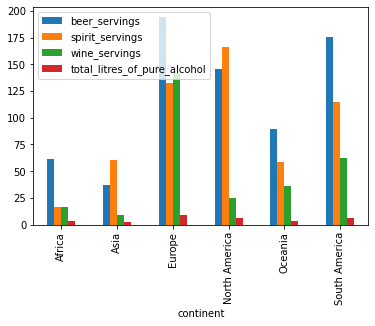

In [15]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

## 15. How do I explore a pandas Series?

In [16]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [17]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

**Exploring a non-numeric Series:**

In [18]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html)

In [19]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [20]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [21]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

pandas.core.series.Series

In [22]:
# thus, you can add another Series method on the end
movies.genre.value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [23]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [24]:
# count the number of unique values in the Series
movies.genre.nunique()

16

Documentation for [**`unique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) and [**`nunique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)

In [25]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Documentation for [**`crosstab`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

**Exploring a numeric Series:**

In [26]:
# calculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [27]:
# many statistics are implemented as Series methods
movies.duration.mean()

120.97957099080695

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)

In [28]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts().head()

112    23
113    22
102    20
101    20
129    19
Name: duration, dtype: int64

In [29]:
# allow plots to appear in the notebook
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

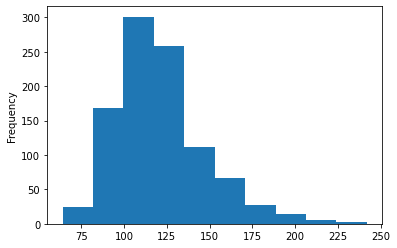

In [30]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

<AxesSubplot:>

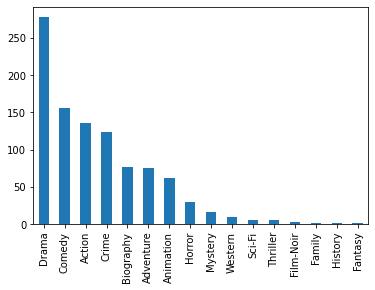

In [31]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 16. How do I handle missing values in pandas?

In [38]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')
#ufo.describe()
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**What does "NaN" mean?**

- "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
- It stands for "Not a Number" and indicates a **missing value**.
- **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [33]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [34]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

In [35]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

1. The **`sum`** method for a DataFrame operates on **`axis=0`** by default (and thus produces column sums).
2. In order to add boolean values, pandas converts **`True`** to **1** and **`False`** to **0**.

In [41]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


**How to handle missing values** depends on the dataset as well as the nature of your analysis. Here are some options:

In [42]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [43]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

Documentation for [**`dropna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [44]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [45]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [46]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [47]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [48]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [49]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [50]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

Documentation for [**`fillna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [51]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

[Working with missing data in pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

## 17. What do I need to know about the pandas index? (Part 1)

In [52]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [53]:
# every DataFrame has an index (sometimes called the "row labels")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [54]:
# column names are also stored in a special "index" object
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [55]:
# neither the index nor the columns are included in the shape
drinks.shape

(193, 6)

In [56]:
# index and columns both default to integers if you don't define them
pd.read_table('data/u.user', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**What is the index used for?**

1. identification
2. selection
3. alignment (covered in the next video)

In [57]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [58]:
# selection: select a portion of the DataFrame using the index
drinks.loc[23, 'beer_servings']

245

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

In [59]:
# set an existing column as the index
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [60]:
# 'country' is now the index
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [61]:
# 'country' is no longer a column
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [62]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

(193, 5)

In [63]:
# country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

245

In [66]:
# index name is optional
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [67]:
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


Documentation for [**`reset_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [68]:
# many DataFrame methods output a DataFrame
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [69]:
# you can interact with any DataFrame using its index and columns
drinks.describe().loc['25%', 'beer_servings']

20.0

[Indexing and selecting data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 18. What do I need to know about the pandas index? (Part 2)

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

In [ ]:
# every DataFrame has an index
drinks.index

In [ ]:
# every Series also has an index (which carries over from the DataFrame)
drinks.continent.head()

In [ ]:
# set 'country' as the index
drinks.set_index('country', inplace=True)

Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [ ]:
# Series index is on the left, values are on the right
drinks.continent.head()

In [ ]:
# another example of a Series (output from the 'value_counts' method)
drinks.continent.value_counts()

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [ ]:
# access the Series index
drinks.continent.value_counts().index

In [ ]:
# access the Series values
drinks.continent.value_counts().values

In [ ]:
# elements in a Series can be selected by index (using bracket notation)
drinks.continent.value_counts()['Africa']

In [ ]:
# any Series can be sorted by its values
drinks.continent.value_counts().sort_values()

In [ ]:
# any Series can also be sorted by its index
drinks.continent.value_counts().sort_index()

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) and [**`sort_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html)

**What is the index used for?**

1. identification (covered in the previous video)
2. selection (covered in the previous video)
3. alignment

In [ ]:
# 'beer_servings' Series contains the average annual beer servings per person
drinks.beer_servings.head()

In [ ]:
# create a Series containing the population of two countries
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
people

Documentation for [**`Series`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

In [ ]:
# calculate the total annual beer servings for each country
(drinks.beer_servings * people).head()

- The two Series were **aligned** by their indexes.
- If a value is missing in either Series, the result is marked as **NaN**.
- Alignment enables us to easily work with **incomplete data**.

In [ ]:
# concatenate the 'drinks' DataFrame with the 'population' Series (aligns by the index)
pd.concat([drinks, people], axis=1).head()

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

[Indexing and selecting data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 19. How do I select multiple rows and columns from a pandas DataFrame?

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')
ufo.head(3)

The [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method is used to select rows and columns by **label**. You can pass it:

- A single label
- A list of labels
- A slice of labels
- A boolean Series
- A colon (which indicates "all labels")

In [ ]:
# row 0, all columns
ufo.loc[0, :]

In [ ]:
# rows 0 and 1 and 2, all columns
ufo.loc[[0, 1, 2], :]

In [ ]:
# rows 0 through 2 (inclusive), all columns
ufo.loc[0:2, :]

In [ ]:
# this implies "all columns", but explicitly stating "all columns" is better
ufo.loc[0:2]

In [ ]:
# rows 0 through 2 (inclusive), column 'City'
ufo.loc[0:2, 'City']

In [ ]:
# rows 0 through 2 (inclusive), columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

In [ ]:
# accomplish the same thing using double brackets - but using 'loc' is preferred since it's more explicit
ufo[['City', 'State']].head(3)

In [ ]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

In [ ]:
# accomplish the same thing using 'head' and 'drop'
ufo.head(3).drop('Time', axis=1)

In [ ]:
# rows in which the 'City' is 'Oakland', column 'State'
ufo.loc[ufo.City=='Oakland', 'State']

In [ ]:
# accomplish the same thing using "chained indexing" - but using 'loc' is preferred since chained indexing can cause problems
ufo[ufo.City=='Oakland'].State

The [**`iloc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) method is used to select rows and columns by **integer position**. You can pass it:

- A single integer position
- A list of integer positions
- A slice of integer positions
- A colon (which indicates "all integer positions")

In [ ]:
# rows in positions 0 and 1, columns in positions 0 and 3
ufo.iloc[[0, 1], [0, 3]]

In [ ]:
# rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive)
ufo.iloc[0:2, 0:4]

In [ ]:
# rows in positions 0 through 2 (exclusive), all columns
ufo.iloc[0:2, :]

In [ ]:
# accomplish the same thing - but using 'iloc' is preferred since it's more explicit
ufo[0:2]

[Summary of the pandas API for selection](https://github.com/pydata/pandas/issues/9595)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 20. When should I use the "inplace" parameter in pandas?

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')
ufo.head()

In [ ]:
ufo.shape

In [ ]:
# remove the 'City' column (doesn't affect the DataFrame since inplace=False)
ufo.drop('City', axis=1).head()

In [ ]:
# confirm that the 'City' column was not actually removed
ufo.head()

In [ ]:
# remove the 'City' column (does affect the DataFrame since inplace=True)
ufo.drop('City', axis=1, inplace=True)

In [ ]:
# confirm that the 'City' column was actually removed
ufo.head()

In [ ]:
# drop a row if any value is missing from that row (doesn't affect the DataFrame since inplace=False)
ufo.dropna(how='any').shape

In [ ]:
# confirm that no rows were actually removed
ufo.shape

In [ ]:
# use an assignment statement instead of the 'inplace' parameter
ufo = ufo.set_index('Time')
ufo.tail()

In [ ]:
# fill missing values using "backward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='bfill').tail()

In [ ]:
# compare with "forward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='ffill').tail()

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 21. How do I make my pandas DataFrame smaller and faster?

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

In [ ]:
# exact memory usage is unknown because object columns are references elsewhere
drinks.info()

In [ ]:
# force pandas to calculate the true memory usage
drinks.info(memory_usage='deep')

In [ ]:
# calculate the memory usage for each Series (in bytes)
drinks.memory_usage(deep=True)

Documentation for [**`info`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) and [**`memory_usage`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.memory_usage.html)

In [ ]:
# use the 'category' data type (new in pandas 0.15) to store the 'continent' strings as integers
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

In [ ]:
# 'continent' Series appears to be unchanged
drinks.continent.head()

In [ ]:
# strings are now encoded (0 means 'Africa', 1 means 'Asia', 2 means 'Europe', etc.)
drinks.continent.cat.codes.head()

In [ ]:
# memory usage has been drastically reduced
drinks.memory_usage(deep=True)

In [ ]:
# repeat this process for the 'country' Series
drinks['country'] = drinks.country.astype('category')
drinks.memory_usage(deep=True)

In [ ]:
# memory usage increased because we created 193 categories
drinks.country.cat.categories

The **category** data type should only be used with a string Series that has a **small number of possible values**.

In [ ]:
# create a small DataFrame from a dictionary
df = pd.DataFrame({'ID':[100, 101, 102, 103], 'quality':['good', 'very good', 'good', 'excellent']})
df

In [ ]:
# sort the DataFrame by the 'quality' Series (alphabetical order)
df.sort_values('quality')

In [ ]:
# define a logical ordering for the categories
df['quality'] = df.quality.astype('category', categories=['good', 'very good', 'excellent'], ordered=True)
df.quality

In [ ]:
# sort the DataFrame by the 'quality' Series (logical order)
df.sort_values('quality')

In [ ]:
# comparison operators work with ordered categories
df.loc[df.quality > 'good', :]

[Overview of categorical data in pandas](http://pandas.pydata.org/pandas-docs/stable/categorical.html)

[API reference for categorical methods](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 22. How do I use pandas with scikit-learn to create Kaggle submissions?

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('data/titanic_train.csv')
train.head()

**Goal:** Predict passenger survival aboard the Titanic based on [passenger attributes](https://www.kaggle.com/c/titanic/data)

**Video:** [What is machine learning, and how does it work?](https://www.youtube.com/watch?v=elojMnjn4kk&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=1)

In [ ]:
# create a feature matrix 'X' by selecting two DataFrame columns
feature_cols = ['Pclass', 'Parch']
X = train.loc[:, feature_cols]
X.shape

In [ ]:
# create a response vector 'y' by selecting a Series
y = train.Survived
y.shape

**Note:** There is no need to convert these pandas objects to NumPy arrays. scikit-learn will understand these objects as long as they are entirely numeric and the proper shapes.

In [ ]:
# fit a classification model to the training data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)

**Video series:** [Introduction to machine learning with scikit-learn](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)

In [ ]:
# read the testing dataset from Kaggle's Titanic competition into a DataFrame
test = pd.read_csv('data/titanic_test.csv')
test.head()

In [ ]:
# create a feature matrix from the testing data that matches the training data
X_new = test.loc[:, feature_cols]
X_new.shape

In [ ]:
# use the fitted model to make predictions for the testing set observations
new_pred_class = logreg.predict(X_new)

In [ ]:
# create a DataFrame of passenger IDs and testing set predictions
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).head()

Documentation for the [**`DataFrame`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) constructor

In [ ]:
# ensure that PassengerID is the first column by setting it as the index
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').head()

In [ ]:
# write the DataFrame to a CSV file that can be submitted to Kaggle
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').to_csv('sub.csv')

Documentation for [**`to_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [ ]:
# save a DataFrame to disk ("pickle it")
train.to_pickle('train.pkl')

In [ ]:
# read a pickled object from disk ("unpickle it")
pd.read_pickle('train.pkl').head()

Documentation for [**`to_pickle`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) and [**`read_pickle`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 23. More of your pandas questions answered!

**Question:** Could you explain how to read the pandas documentation?

[pandas API reference](http://pandas.pydata.org/pandas-docs/stable/api.html)

**Question:** What is the difference between **`ufo.isnull()`** and **`pd.isnull(ufo)`**?

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')
ufo.head()

In [ ]:
# use 'isnull' as a top-level function
pd.isnull(ufo).head()

In [ ]:
# equivalent: use 'isnull' as a DataFrame method
ufo.isnull().head()

Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)

**Question:** Why are DataFrame slices inclusive when using **`.loc`**, but exclusive when using **`.iloc`**?

In [ ]:
# label-based slicing is inclusive of the start and stop
ufo.loc[0:4, :]

In [ ]:
# position-based slicing is inclusive of the start and exclusive of the stop
ufo.iloc[0:4, :]

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) and [**`iloc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html)

In [ ]:
# 'iloc' is simply following NumPy's slicing convention...
ufo.values[0:4, :]

In [ ]:
# ...and NumPy is simply following Python's slicing convention
'python'[0:4]

In [ ]:
# 'loc' is inclusive of the stopping label because you don't necessarily know what label will come after it
ufo.loc[0:4, 'City':'State']

**Question:** How do I randomly sample rows from a DataFrame?

In [ ]:
# sample 3 rows from the DataFrame without replacement (new in pandas 0.16.1)
ufo.sample(n=3)

Documentation for [**`sample`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

In [ ]:
# use the 'random_state' parameter for reproducibility
ufo.sample(n=3, random_state=42)

In [ ]:
# sample 75% of the DataFrame's rows without replacement
train = ufo.sample(frac=0.75, random_state=99)

In [ ]:
# store the remaining 25% of the rows in another DataFrame
test = ufo.loc[~ufo.index.isin(train.index), :]

Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.isin.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 24. How do I create dummy variables in pandas?

In [ ]:
# read the training dataset from Kaggle's Titanic competition
train = pd.read_csv('data/titanic_train.csv')
train.head()

In [ ]:
# create the 'Sex_male' dummy variable using the 'map' method
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})
train.head()

Documentation for [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)

In [ ]:
# alternative: use 'get_dummies' to create one column for every possible value
pd.get_dummies(train.Sex).head()

Generally speaking:

- If you have **"K" possible values** for a categorical feature, you only need **"K-1" dummy variables** to capture all of the information about that feature.
- One convention is to **drop the first dummy variable**, which defines that level as the "baseline".

In [ ]:
# drop the first dummy variable ('female') using the 'iloc' method
pd.get_dummies(train.Sex).iloc[:, 1:].head()

In [ ]:
# add a prefix to identify the source of the dummy variables
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:].head()

In [ ]:
# use 'get_dummies' with a feature that has 3 possible values
pd.get_dummies(train.Embarked, prefix='Embarked').head(10)

In [ ]:
# drop the first dummy variable ('C')
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:].head(10)

How to translate these values back to the original 'Embarked' value:

- **0, 0** means **C**
- **1, 0** means **Q**
- **0, 1** means **S**

In [ ]:
# save the DataFrame of dummy variables and concatenate them to the original DataFrame
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:]
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [ ]:
# reset the DataFrame
train = pd.read_csv('data/titanic_train.csv')
train.head()

In [ ]:
# pass the DataFrame to 'get_dummies' and specify which columns to dummy (it drops the original columns)
pd.get_dummies(train, columns=['Sex', 'Embarked']).head()

In [ ]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head()

Documentation for [**`get_dummies`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 25. How do I work with dates and times in pandas?

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('data/ufo.csv')
ufo.head()

In [ ]:
# 'Time' is currently stored as a string
ufo.dtypes

In [ ]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5, -3).astype(int).head()

In [ ]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

In [ ]:
ufo.dtypes

Documentation for [**`to_datetime`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [ ]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

In [ ]:
ufo.Time.dt.weekday_name.head()

In [ ]:
ufo.Time.dt.dayofyear.head()

API reference for [datetime properties and methods](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [ ]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

In [ ]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :].head()

In [ ]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

In [ ]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline

In [ ]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

In [ ]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 26. How do I find and remove duplicate rows in pandas?

In [ ]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('data/u.user', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

In [ ]:
users.shape

In [ ]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

In [ ]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

In [ ]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

In [ ]:
# count the duplicate rows
users.duplicated().sum()

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [ ]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

In [ ]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

In [ ]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

In [ ]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

In [ ]:
users.drop_duplicates(keep='last').shape

In [ ]:
users.drop_duplicates(keep=False).shape

Documentation for [**`drop_duplicates`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [ ]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

In [ ]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 27. How do I avoid a SettingWithCopyWarning in pandas?

In [ ]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

In [ ]:
# count the missing values in the 'content_rating' Series
movies.content_rating.isnull().sum()

In [ ]:
# examine the DataFrame rows that contain those missing values
movies[movies.content_rating.isnull()]

In [ ]:
# examine the unique values in the 'content_rating' Series
movies.content_rating.value_counts()

**Goal:** Mark the 'NOT RATED' values as missing values, represented by 'NaN'.

In [ ]:
# first, locate the relevant rows
movies[movies.content_rating=='NOT RATED'].head()

In [ ]:
# then, select the 'content_rating' Series from those rows
movies[movies.content_rating=='NOT RATED'].content_rating.head()

In [ ]:
# finally, replace the 'NOT RATED' values with 'NaN' (imported from NumPy)
import numpy as np
movies[movies.content_rating=='NOT RATED'].content_rating = np.nan

**Problem:** That statement involves two operations, a **`__getitem__`** and a **`__setitem__`**. pandas can't guarantee whether the **`__getitem__`** operation returns a view or a copy of the data.

- If **`__getitem__`** returns a view of the data, **`__setitem__`** will affect the 'movies' DataFrame.
- But if **`__getitem__`** returns a copy of the data, **`__setitem__`** will not affect the 'movies' DataFrame.

In [ ]:
# the 'content_rating' Series has not changed
movies.content_rating.isnull().sum()

**Solution:** Use the **`loc`** method, which replaces the 'NOT RATED' values in a single **`__setitem__`** operation.

In [ ]:
# replace the 'NOT RATED' values with 'NaN' (does not cause a SettingWithCopyWarning)
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [ ]:
# this time, the 'content_rating' Series has changed
movies.content_rating.isnull().sum()

**Summary:** Use the **`loc`** method any time you are selecting rows and columns in the same statement.

**More information:** [Modern Pandas (Part 1)](http://tomaugspurger.github.io/modern-1.html)

In [ ]:
# create a DataFrame only containing movies with a high 'star_rating'
top_movies = movies.loc[movies.star_rating >= 9, :]
top_movies

**Goal:** Fix the 'duration' for 'The Shawshank Redemption'.

In [ ]:
# overwrite the relevant cell with the correct duration
top_movies.loc[0, 'duration'] = 150

**Problem:** pandas isn't sure whether 'top_movies' is a view or a copy of 'movies'.

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

In [ ]:
# 'movies' DataFrame has not been updated
movies.head(1)

**Solution:** Any time you are attempting to create a DataFrame copy, use the [**`copy`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html) method.

In [ ]:
# explicitly create a copy of 'movies'
top_movies = movies.loc[movies.star_rating >= 9, :].copy()

In [ ]:
# pandas now knows that you are updating a copy instead of a view (does not cause a SettingWithCopyWarning)
top_movies.loc[0, 'duration'] = 150

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

Documentation on indexing and selection: [Returning a view versus a copy](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy)

Stack Overflow: [What is the point of views in pandas if it is undefined whether an indexing operation returns a view or a copy?](http://stackoverflow.com/questions/34884536/what-is-the-point-of-views-in-pandas-if-it-is-undefined-whether-an-indexing-oper)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 28. How do I change display options in pandas?

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')

In [ ]:
# only 60 rows will be displayed when printing
drinks

In [ ]:
# check the current setting for the 'max_rows' option
pd.get_option('display.max_rows')

Documentation for [**`get_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_option.html)

In [ ]:
# overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows', None)
drinks

In [ ]:
# reset the 'max_rows' option to its default
pd.reset_option('display.max_rows')

Documentation for [**`set_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html) and [**`reset_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.reset_option.html)

In [ ]:
# the 'max_columns' option is similar to 'max_rows'
pd.get_option('display.max_columns')

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('data/titanic_train.csv')
train.head()

In [ ]:
# an ellipsis is displayed in the 'Name' cell of row 1 because of the 'max_colwidth' option
pd.get_option('display.max_colwidth')

In [ ]:
# overwrite the current setting so that more characters will be displayed
pd.set_option('display.max_colwidth', 1000)
train.head()

In [ ]:
# overwrite the 'precision' setting to display 2 digits after the decimal point of 'Fare'
pd.set_option('display.precision', 2)
train.head()

In [ ]:
# add two meaningless columns to the drinks DataFrame
drinks['x'] = drinks.wine_servings * 1000
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000
drinks.head()

In [ ]:
# use a Python format string to specify a comma as the thousands separator
pd.set_option('display.float_format', '{:,}'.format)
drinks.head()

In [ ]:
# 'y' was affected (but not 'x') because the 'float_format' option only affects floats (not ints)
drinks.dtypes

In [ ]:
# view the option descriptions (including the default and current values)
pd.describe_option()

In [ ]:
# search for specific options by name
pd.describe_option('rows')

Documentation for [**`describe_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.describe_option.html)

In [ ]:
# reset all of the options to their default values
pd.reset_option('all')

[Options and Settings](http://pandas.pydata.org/pandas-docs/stable/options.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 29. How do I create a pandas DataFrame from another object?

In [ ]:
# create a DataFrame from a dictionary (keys become column names, values become data)
pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']})

In [ ]:
# optionally specify the order of columns and define the index
df = pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']}, columns=['id', 'color'], index=['a', 'b', 'c'])
df

Documentation for [**`DataFrame`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

In [ ]:
# create a DataFrame from a list of lists (each inner list becomes a row)
pd.DataFrame([[100, 'red'], [101, 'blue'], [102, 'red']], columns=['id', 'color'])

In [ ]:
# create a NumPy array (with shape 4 by 2) and fill it with random numbers between 0 and 1
import numpy as np
arr = np.random.rand(4, 2)
arr

In [ ]:
# create a DataFrame from the NumPy array
pd.DataFrame(arr, columns=['one', 'two'])

In [ ]:
# create a DataFrame of student IDs (100 through 109) and test scores (random integers between 60 and 100)
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)})

Documentation for [**`np.arange`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and [**`np.random`**](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [ ]:
# 'set_index' can be chained with the DataFrame constructor to select an index
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)}).set_index('student')

Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [ ]:
# create a new Series using the Series constructor
s = pd.Series(['round', 'square'], index=['c', 'b'], name='shape')
s

Documentation for [**`Series`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

In [ ]:
# concatenate the DataFrame and the Series (use axis=1 to concatenate columns)
pd.concat([df, s], axis=1)

**Notes:**

- The Series name became the column name in the DataFrame.
- The Series data was aligned to the DataFrame by its index.
- The 'shape' for row 'a' was marked as a missing value (NaN) because that index was not present in the Series.

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]

## 30. How do I apply a function to a pandas Series or DataFrame?

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('data/titanic_train.csv')
train.head()

**Goal:** Map the existing values of a Series to a different set of values

**Method:** [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) (Series method)

In [ ]:
# map 'female' to 0 and 'male' to 1
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})
train.loc[0:4, ['Sex', 'Sex_num']]

**Goal:** Apply a function to each element in a Series

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) (Series method)

**Note:** **`map`** can be substituted for **`apply`** in many cases, but **`apply`** is more flexible and thus is recommended

In [ ]:
# calculate the length of each string in the 'Name' Series
train['Name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'Name_length']]

In [ ]:
# round up each element in the 'Fare' Series to the next integer
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

In [ ]:
# we want to extract the last name of each person
train.Name.head()

In [ ]:
# use a string method to split the 'Name' Series at commas (returns a Series of lists)
train.Name.str.split(',').head()

In [ ]:
# define a function that returns an element from a list based on position
def get_element(my_list, position):
    return my_list[position]

In [ ]:
# apply the 'get_element' function and pass 'position' as a keyword argument
train.Name.str.split(',').apply(get_element, position=0).head()

In [ ]:
# alternatively, use a lambda function
train.Name.str.split(',').apply(lambda x: x[0]).head()

**Goal:** Apply a function along either axis of a DataFrame

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) (DataFrame method)

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

In [ ]:
# select a subset of the DataFrame to work with
drinks.loc[:, 'beer_servings':'wine_servings'].head()

In [ ]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

In [ ]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

In [ ]:
# use 'np.argmax' to calculate which column has the maximum value for each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()

**Goal:** Apply a function to every element in a DataFrame

**Method:** [**`applymap`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html) (DataFrame method)

In [ ]:
# convert every DataFrame element into a float
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

In [ ]:
# overwrite the existing DataFrame columns
drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()

[<a href="#Python-pandas-Q&A-video-series-by-Data-School">Back to top</a>]